<a href="https://colab.research.google.com/github/SobolMaria/goit-ds-hw-05/blob/main/Hw2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sourse = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
df = pd.read_html(sourse, match="Коефіцієнт народжуваності в регіонах України", thousands=".", decimal=",")[0]

In [ ]:
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [ ]:
lines, columns = df.shape
print(f"Lines: {lines}\nColums: {columns}")

Lines: 28
Colums: 9


In [ ]:
df = df.replace({"—": np.NaN})
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


In [ ]:
df.dtypes

,0
Регіон,object
1950,float64
1960,float64
1970,float64
1990,float64
2000,float64
2012,float64
2014,object
2019,object


In [ ]:
obj_columns = df.columns[df.isnull().any()].tolist()
df[obj_columns] = df[obj_columns].astype(np.float64)

df.dtypes

,0
Регіон,object
1950,float64
1960,float64
1970,float64
1990,float64
2000,float64
2012,float64
2014,float64
2019,float64


In [ ]:
df.isnull().sum() / len(df)

,0
Регіон,0.000000
1950,0.071429
1960,0.035714
1970,0.035714
1990,0.000000
2000,0.000000
2012,0.000000
2014,0.071429
2019,0.142857


In [ ]:
df = df.drop([27], axis=0)

df.tail(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,20.5,17.9,14.4,12.3,7.5,10.0,9.8,6.4
23,Чернівецька,24.7,21.8,17.0,14.8,10.1,12.8,12.9,9.2
24,Чернігівська,22.0,18.3,12.7,10.8,6.9,9.4,9.0,6.1
25,Київ,NaN,17.4,15.9,12.0,7.3,12.0,12.1,11.0
26,Севастополь,NaN,NaN,NaN,12.5,7.0,12.0,NaN,NaN


In [ ]:
df = df.fillna(df.mean(numeric_only=True), axis=0)

df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,11.144,8.017391
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.900,7.600000
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.100,10.100000
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.100,7.100000
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.200,8.017391


In [ ]:
average = df["2019"].mean()
print(f"Avereage: {average}")
df.loc[df["2019"] > average]

Avereage: 8.017391304347827


,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
2,Волинська,24.700,25.0,17.9,15.3,11.2,14.8,14.1,10.1
6,Закарпатська,31.400,27.3,20.7,16.8,11.5,15.1,14.6,10.4
8,Івано-Франківська,24.300,24.8,18.2,15.5,10.3,12.4,12.2,8.8
12,Львівська,23.400,24.0,17.1,14.0,9.1,11.9,11.9,8.7
14,Одеська,24.100,19.2,14.8,12.6,8.0,12.7,12.3,8.8
16,Рівненська,26.900,26.7,19.3,15.8,11.8,15.9,14.8,10.7
20,Херсонська,20.800,21.4,16.6,14.3,8.5,11.7,11.5,8.1
23,Чернівецька,24.700,21.8,17.0,14.8,10.1,12.8,12.9,9.2
25,Київ,23.104,17.4,15.9,12.0,7.3,12.0,12.1,11.0


In [ ]:
max_birth = df["2014"].max()
df.loc[df["2014"] == max_birth]

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
16,Рівненська,26.9,26.7,19.3,15.8,11.8,15.9,14.8,10.7


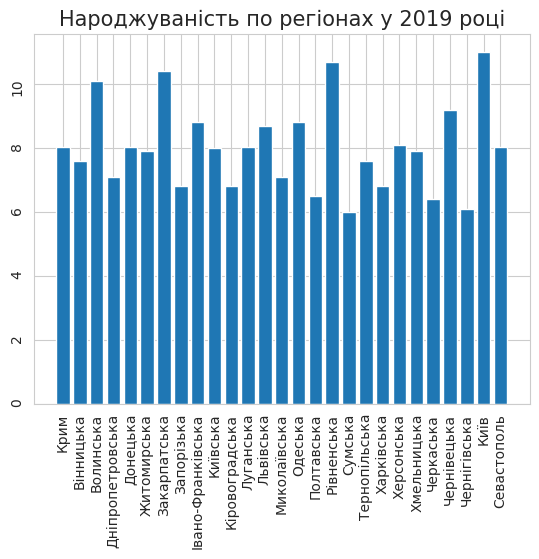

In [ ]:
sns.set_style("whitegrid")
plt.bar(df["Регіон"], df["2019"])
plt.title("Народжуваність по регіонах у 2019 році", fontsize=15)
plt.tick_params(labelrotation=90)

plt.show()

In [ ]:
sns.set_style("whitegrid")
plt.bar(df["Регіон"], df["2019"])
plt.title("Народжуваність по регіонах у 2019 році", fontsize=15)
plt.tick_params(labelrotation=90)

plt.show()

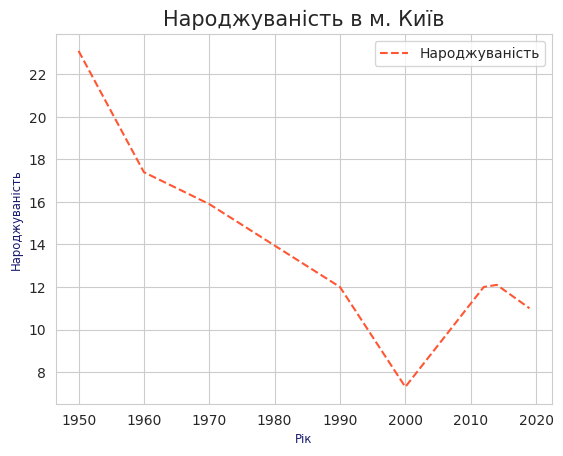

In [33]:
years = [1950, 1960, 1970, 1990, 2000, 2012, 2014, 2019]

plt.plot(
    years, df.loc[25, ["1950", "1960", "1970", "1990", "2000", "2012", "2014", "2019"]],
    label="Народжуваність", linestyle="--", color="#FF5733"
)
plt.xlabel("Рік", fontsize="small", color="midnightblue")
plt.ylabel("Народжуваність", fontsize="small", color="midnightblue")
plt.title("Народжуваність в м. Київ", fontsize=15)
plt.legend()
plt.show()

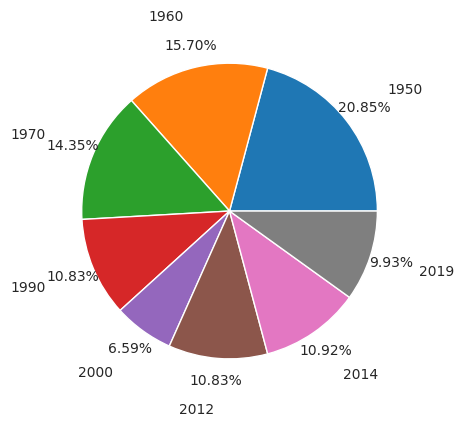

In [36]:
labels = [ "1950", "1960", "1970", "1990", "2000", "2012", "2014", "2019"]

data = [23.104,	17.4,	15.9,	12.0,	7.3,	12.0,	12.1,	11.0]
plt.pie(
    data,
    labels=labels,
    shadow=False,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()